* Propose a project to do while at The Data Incubator. We want to know about your ability to think at a high level. Try to think of projects that users or businesses will care about that are also relatively unanalyzed. Here are some useful links about data sources on our blog as well as the archive of data sources on Data is Plural. You can see some final projects of previous Fellows on our YouTube Page.

* Propose a project that uses a large, publicly accessible dataset. Explain your motivation for tackling this problem, discuss the data source(s) you are using, and explain the analysis you are performing. At a minimum, you will need to do enough exploratory data analysis to convince someone that the project is viable and generate two interesting non-trivial plots or other assets supporting this. Explain the plots and give url links to them. For guidance on how to choose a project, check out this blog post.

In [2]:
import pandas as pd
import numpy as np

In [3]:
raw_data = pd.read_csv("International_Ed/data.csv")
print(raw_data.columns)
print(raw_data.shape)
raw_data.head(2)

Index(['Country Name', 'Country Code', 'Series', 'Series Code',
       '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]',
       '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]',
       '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]'],
      dtype='object')
(24929, 15)


,Country Name,Country Code,Series,Series Code,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,Human Capital Index (HCI) Score: Female (Scale...,HD.HCI.OVRL.FE,..,..,..,..,..,..,..,0.363,..,..,..
1,Afghanistan,AFG,Human Capital Index (HCI) Score: Total (Scale ...,HD.HCI.OVRL,..,..,..,..,..,..,..,0.389,..,..,..


In [4]:
raw_data["Series"].unique()

array(['Human Capital Index (HCI) Score: Female (Scale 0-1)',
       'Human Capital Index (HCI) Score: Total (Scale 0-1)',
       'Human Capital Index (HCI) Score: Male (Scale 0-1)',
       'GDP per capita (current US$)',
       'Unemployment, total (% of total labor force)',
       'Unemployment, female (% of female labor force)',
       'Unemployment, male (% of male labor force)',
       'Personal computers (per 100 people)', 'Labor force, total',
       'Labor force, female (% of total labor force)',
       'Labor force with advanced education, female (% of female labor force)',
       'Labor force with basic education (% of total labor force)',
       'Labor force with basic education, male (% of male labor force)',
       'Labor force with intermediate education, female (% of female labor force)',
       'Labor force with intermediate education, male (% of male labor force)',
       'Labor force with intermediate education (% of total labor force )',
       'Labor force with basi

In [ ]:
raw_data["Series Code"].unique()

In [26]:
country_info = pd.read_csv("international_ed/country_info.csv")
print(country_info.columns)
print(country_info.shape)
country_info.head(2)

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')
(241, 32)


,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN


In [27]:
methodology = pd.read_csv("international_ed/methodology.csv")
print(methodology.columns)
print(methodology.shape)
methodology.head(2)

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')
(3665, 21)


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
methodology["Series Code"].unique()

array(['BAR.NOED.1519.FE.ZS', 'BAR.NOED.1519.ZS', 'BAR.NOED.15UP.FE.ZS',
       ..., 'UIS.XUNIT.USCONST.56.FSGOV', 'XGDP.23.FSGOV.FDINSTADM.FFD',
       'XGDP.56.FSGOV.FDINSTADM.FFD'], dtype=object)

In [28]:
methodology["Topic"].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

In [ ]:
methodology.loc[methodology["Topic"] == "Learning Outcomes"]

In [ ]:
methodology.loc[methodology["Series Code"].str.contains("TIMSS", na=False)]

# moma_valid.loc[moma_valid["Medium"].str.contains("paper", na=False)

In [ ]:
datasource = pd.read_csv("international_ed/datasource.csv")
print(datasource.columns)
print(datasource.shape)
datasource.head()

In [ ]:
notes = pd.read_csv("international_ed/notes.csv")
print(notes.columns)
print(notes.shape)
notes.head()

In [58]:
usa = raw_data.loc[raw_data["Country Code"].str.contains("USA", na=False)]
print(usa.shape)
usa.head(30)

(93, 15)


,Country Name,Country Code,Series,Series Code,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
23715,United States,USA,Human Capital Index (HCI) Score: Female (Scale...,HD.HCI.OVRL.FE,..,..,..,..,..,..,..,0.757,..,..,..
23716,United States,USA,Human Capital Index (HCI) Score: Total (Scale ...,HD.HCI.OVRL,..,..,..,..,..,..,..,0.762,..,..,..
23717,United States,USA,Human Capital Index (HCI) Score: Male (Scale 0-1),HD.HCI.OVRL.MA,..,..,..,..,..,..,..,0.726,..,..,..
23718,United States,USA,GDP per capita (current US$),NY.GDP.PCAP.CD,48466.8233750801,49883.1139837344,51603.4972614412,53106.9097703155,55032.9579979166,56803.4724334919,57904.2019610641,59927.9298339535,62794.5856522398,..,..
23719,United States,USA,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,9.63300037384033,8.94900035858154,8.06900024414063,7.375,6.16800022125244,5.28000020980835,4.86899995803833,4.35500001907349,3.89599990844727,3.68199992179871,..
23720,United States,USA,"Unemployment, female (% of female labor force)",SL.UEM.TOTL.FE.ZS,8.61200046539307,8.45899963378906,7.8899998664856,7.07100009918213,6.05900001525879,5.17700004577637,4.78800010681152,4.30800008773804,3.83699989318848,3.6159999370575,..
23721,United States,USA,"Unemployment, male (% of male labor force)",SL.UEM.TOTL.MA.ZS,10.5100002288818,9.36900043487549,8.22200012207031,7.63299989700317,6.26000022888184,5.36700010299683,4.93800020217896,4.39599990844727,3.94600009918213,3.73799991607666,..
23722,United States,USA,Personal computers (per 100 people),IT.CMP.PCMP.P2,..,..,..,..,..,..,..,..,..,..,..
23723,United States,USA,"Labor force, total",SL.TLF.TOTL.IN,156903447,156975333,158636184,158755710,159532062,160596354,162547573,164268059,165483017,166543859,..
23724,United States,USA,"Labor force, female (% of total labor force)",SL.TLF.TOTL.FE.ZS,46.1838904023568,46.1111440993089,45.9391729947311,45.9100362437357,45.9658479183952,45.86337744629,45.8706799639512,46.0250833060613,46.0536744988158,46.0314198676038,..


In [75]:
usa_gdp = usa.loc[(usa["Series Code"].str.contains("NY.GDP.PCAP.CD", na=False))
                  | (usa["Series Code"].str.contains("SL.TLF.TOTL.FE.ZS", na=False))]
usa_gdp

,Country Name,Country Code,Series,Series Code,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
23718,United States,USA,GDP per capita (current US$),NY.GDP.PCAP.CD,48466.8233750801,49883.1139837344,51603.4972614412,53106.9097703155,55032.9579979166,56803.4724334919,57904.2019610641,59927.9298339535,62794.5856522398,..,..
23724,United States,USA,"Labor force, female (% of total labor force)",SL.TLF.TOTL.FE.ZS,46.1838904023568,46.1111440993089,45.9391729947311,45.9100362437357,45.9658479183952,45.86337744629,45.8706799639512,46.0250833060613,46.0536744988158,46.0314198676038,..


In [160]:
usa_gdp_t = usa_gdp.T.iloc[4:13].reset_index()
usa_gdp_t

,index,23718,23724
0,2010 [YR2010],48466.8233750801,46.1838904023568
1,2011 [YR2011],49883.1139837344,46.1111440993089
2,2012 [YR2012],51603.4972614412,45.9391729947311
3,2013 [YR2013],53106.9097703155,45.9100362437357
4,2014 [YR2014],55032.9579979166,45.9658479183952
5,2015 [YR2015],56803.4724334919,45.86337744629
6,2016 [YR2016],57904.2019610641,45.8706799639512
7,2017 [YR2017],59927.9298339535,46.0250833060613
8,2018 [YR2018],62794.5856522398,46.0536744988158


In [161]:
usa_gdp_t = usa_gdp_t.rename(columns={23718:"GDP", 23724: "labor_female"})
usa_gdp_t

,index,GDP,labor_female
0,2010 [YR2010],48466.8233750801,46.1838904023568
1,2011 [YR2011],49883.1139837344,46.1111440993089
2,2012 [YR2012],51603.4972614412,45.9391729947311
3,2013 [YR2013],53106.9097703155,45.9100362437357
4,2014 [YR2014],55032.9579979166,45.9658479183952
5,2015 [YR2015],56803.4724334919,45.86337744629
6,2016 [YR2016],57904.2019610641,45.8706799639512
7,2017 [YR2017],59927.9298339535,46.0250833060613
8,2018 [YR2018],62794.5856522398,46.0536744988158


In [162]:
usa_gdp_t.dtypes

index           object
GDP             object
labor_female    object
dtype: object

In [167]:
usa_gdp_t[["GDP", "labor_female"]] = usa_gdp_t[["GDP", "labor_female"]].astype(np.float64)
usa_gdp_t.dtypes

index            object
GDP             float64
labor_female    float64
dtype: object

<AxesSubplot:xlabel='index', ylabel='labor_female'>

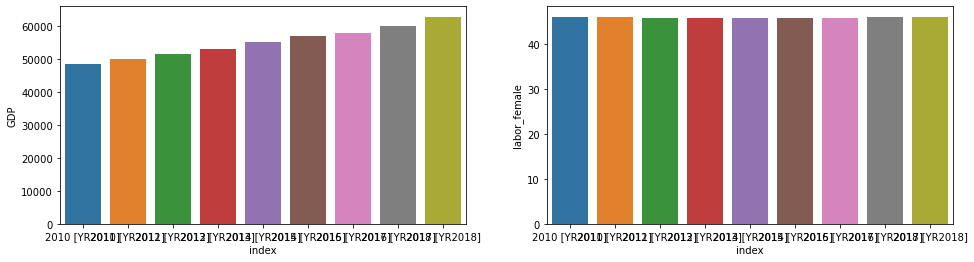

In [177]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)

figure.set_size_inches(16, 4)

sns.barplot(data=usa_gdp_t, x="index", y="GDP", ax=ax1)
sns.barplot(data=usa_gdp_t, x="index", y="labor_female", ax=ax2)

In [179]:
usa_labor = usa.loc[(usa["Series Code"].str.contains("SL.TLF.TOTL.FE.ZS", na=False))
                  | (usa["Series Code"].str.contains("SP.POP.GROW", na=False))]
usa_labor

,Country Name,Country Code,Series,Series Code,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
23724,United States,USA,"Labor force, female (% of total labor force)",SL.TLF.TOTL.FE.ZS,46.1838904023568,46.1111440993089,45.9391729947311,45.9100362437357,45.9658479183952,45.86337744629,45.8706799639512,46.0250833060613,46.0536744988158,46.0314198676038,..
23734,United States,USA,Population growth (annual %),SP.POP.GROW,0.827846041704304,0.720017688665691,0.727268997193117,0.686773155567634,0.727517695817155,0.730641178178307,0.716669413429853,0.631007893230758,0.522337357899676,..,..


In [180]:
usa_labor_t = usa_labor.T.iloc[4:13].reset_index()
usa_labor_t

,index,23724,23734
0,2010 [YR2010],46.1838904023568,0.827846041704304
1,2011 [YR2011],46.1111440993089,0.720017688665691
2,2012 [YR2012],45.9391729947311,0.727268997193117
3,2013 [YR2013],45.9100362437357,0.686773155567634
4,2014 [YR2014],45.9658479183952,0.727517695817155
5,2015 [YR2015],45.86337744629,0.730641178178307
6,2016 [YR2016],45.8706799639512,0.716669413429853
7,2017 [YR2017],46.0250833060613,0.631007893230758
8,2018 [YR2018],46.0536744988158,0.522337357899676


In [182]:
usa_labor_t = usa_labor_t.rename(columns={23724:"labor_female", 23734: "population"})
usa_labor_t

,index,labor_female,population
0,2010 [YR2010],46.1838904023568,0.827846041704304
1,2011 [YR2011],46.1111440993089,0.720017688665691
2,2012 [YR2012],45.9391729947311,0.727268997193117
3,2013 [YR2013],45.9100362437357,0.686773155567634
4,2014 [YR2014],45.9658479183952,0.727517695817155
5,2015 [YR2015],45.86337744629,0.730641178178307
6,2016 [YR2016],45.8706799639512,0.716669413429853
7,2017 [YR2017],46.0250833060613,0.631007893230758
8,2018 [YR2018],46.0536744988158,0.522337357899676


In [184]:
usa_labor_t.dtypes

index           object
labor_female    object
population      object
dtype: object

In [185]:
usa_labor_t[["labor_female", "population"]] = usa_labor_t[["labor_female", "population"]].astype(np.float64)
usa_labor_t.dtypes

index            object
labor_female    float64
population      float64
dtype: object

<AxesSubplot:xlabel='index', ylabel='population'>

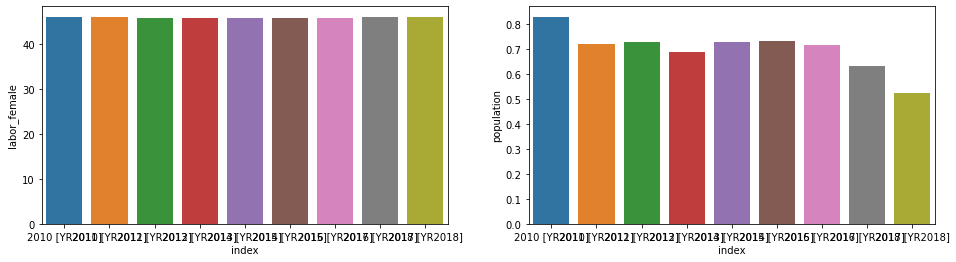

In [186]:
figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)

figure.set_size_inches(16, 4)

sns.barplot(data=usa_labor_t, x="index", y="labor_female", ax=ax1)
sns.barplot(data=usa_labor_t, x="index", y="population", ax=ax2)